In [34]:
# !pip install networkx==1.11

In [35]:
import sys
import networkx as nx

print(nx.__version__) # 2.1

1.11


# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina


## Notes
* analysis needs structure. there should be a step by step approach to the conclusions
* we should describe the steps and the outcomes for each step. right now we need to narrate each step because it is not layed out
* we need to add a more detailed conclusion
* eliminate filler code that does not add to analysis. this included the listing of the nodes and the edges. 

## Suggestions - David
* we can start by reviewing the paper that resulted in the dataset. I can look for write-ups
* I think it is a 5 step analysis ( please provide feedback)
    
    - build graph. including projections
    - initial analysis - quick visualization
    - Bipartite Network Graph reduction using the Island Method , Sub graph and Connected Components
        
        - this should generate 2 clicks and a few outliers
    - measures of centrality
    - conclusions
        
        - 2 clicks in the group
        - most popular events
        - most popular people


### Data

For this project, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

### Load Required Packages

In [36]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import networkx.algorithms.bipartite as bipartite
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis

We have two kinds of nodes: women, and events.

In [37]:
# Import data
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [38]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

First we will create a full bipartite network with both nodes.

In [39]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Degree Centrality

Degree centrality measures the number of connections an individual node has. It looks like Evelyn, Theresa, and Nora have the highest number of connections compared to other women, and the E8 club has the highest number of attendees.

In [40]:
womenDegree = nx.degree(G, women, weight='weight') 
clubsDegree = nx.degree(G, clubs)

In [41]:
#womenDegree
deg_w = dict(sorted(dict(womenDegree).items(), key=lambda item: item[1],reverse=True))
deg_w

{'Evelyn Jefferson': 8,
 'Theresa Anderson': 8,
 'Nora Fayette': 8,
 'Laura Mandeville': 7,
 'Brenda Rogers': 7,
 'Sylvia Avondale': 7,
 'Katherina Rogers': 6,
 'Helen Lloyd': 5,
 'Charlotte McDowd': 4,
 'Frances Anderson': 4,
 'Eleanor Nye': 4,
 'Ruth DeSand': 4,
 'Verne Sanderson': 4,
 'Myra Liddel': 4,
 'Pearl Oglethorpe': 3,
 'Dorothy Murchison': 2,
 'Olivia Carleton': 2,
 'Flora Price': 2}

In [42]:
#womenDegree
deg_c = dict(sorted(dict(clubsDegree).items(), key=lambda item: item[1],reverse=True))
deg_c

{'E8': 14,
 'E9': 12,
 'E7': 10,
 'E5': 8,
 'E6': 8,
 'E3': 6,
 'E12': 6,
 'E10': 5,
 'E4': 4,
 'E11': 4,
 'E1': 3,
 'E2': 3,
 'E13': 3,
 'E14': 3}

### Visualize the network

#### Entire Network

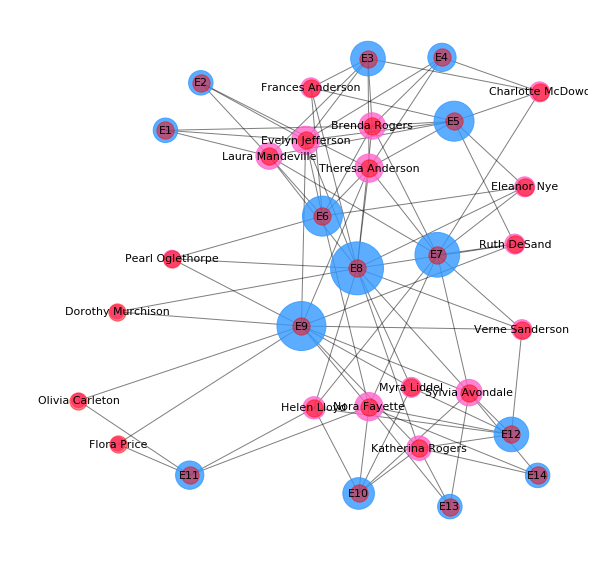

In [43]:
plt.figure(1,figsize=(10,10)) 
pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='#FF66CC',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=clubs,
                       node_color='#3399FF',
                       node_size=[v * 200 for v in dict(clubsDegree).values()],
                   alpha=0.8)

# edges
nx.draw(G,pos,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

#### Women Relationships

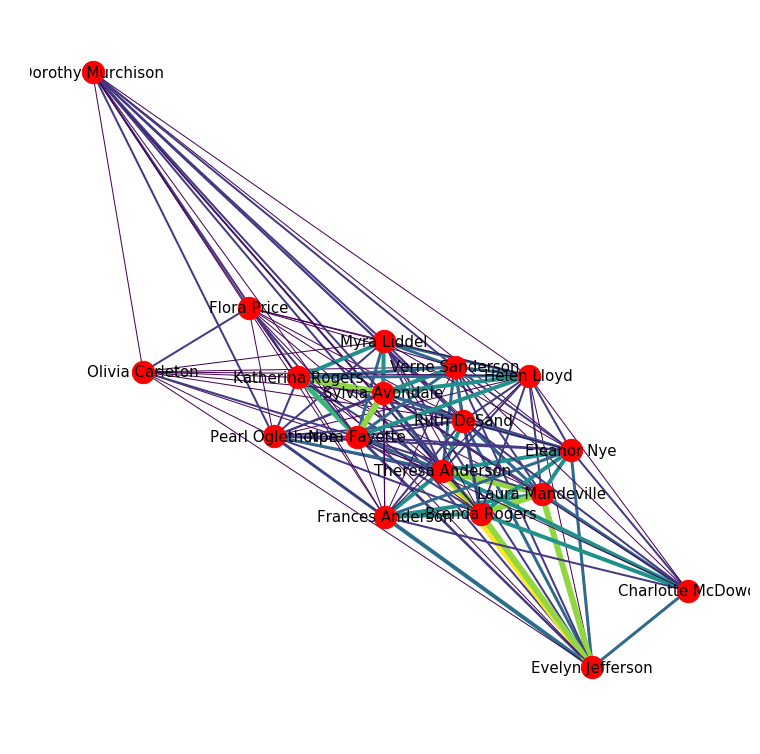

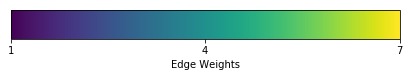

In [44]:
plt.figure(1,figsize=(10,10)) 

# Nodes represent women and edges represent the number of clubs the women share

W = bipartite.weighted_projected_graph(G, women)

weights=[edata['weight'] for f,t,edata in W.edges(data=True)]
#pos1 = nx.spring_layout(W, random_state = 100)
pos1 = nx.spring_layout(W)

nx.draw(W, pos1, with_labels = True, width=weights, edge_color=weights,node_size=500,font_size=15)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='viridis',
                               norm=mpl.colors.Normalize(1,7),
                               ticks=[1, 4, 7],
                               label='Edge Weights')

In [45]:
W.degree()

{'Evelyn Jefferson': 17,
 'Laura Mandeville': 15,
 'Theresa Anderson': 17,
 'Brenda Rogers': 15,
 'Charlotte McDowd': 11,
 'Frances Anderson': 15,
 'Eleanor Nye': 15,
 'Pearl Oglethorpe': 16,
 'Ruth DeSand': 17,
 'Verne Sanderson': 17,
 'Myra Liddel': 16,
 'Katherina Rogers': 16,
 'Sylvia Avondale': 17,
 'Nora Fayette': 17,
 'Helen Lloyd': 17,
 'Dorothy Murchison': 16,
 'Olivia Carleton': 12,
 'Flora Price': 12}

The graph of women affiliations (nodes), in terms of club events (edges), is extremely well connected. Each woman is related to at least 11 out of 17 women.

Not all of the women are equally involved in club activities. There appears to be 2 subgroups within this network. We can see that there are 7 women who are most important.

#### Clubs

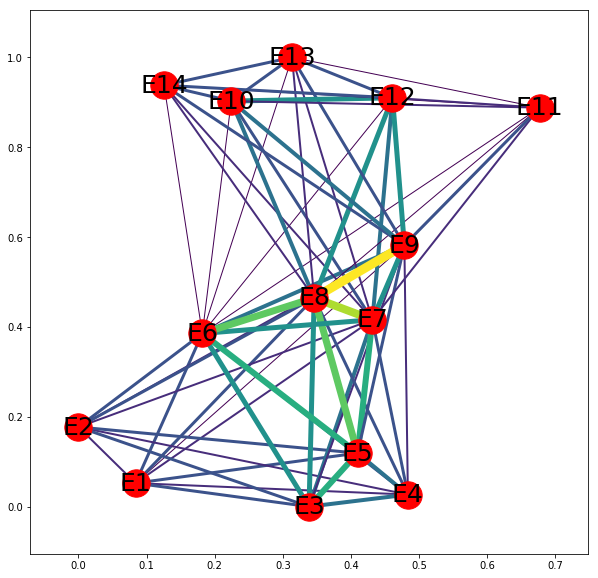

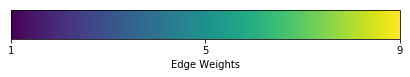

In [46]:
# Nodes represent club events and edges represent the number of women that attended both club events 

plt.figure(1,figsize=(10,10)) 
#pos = nx.spring_layout(G, random_state = 100)
pos = nx.spring_layout(G)

G2 = nx.davis_southern_women_graph()
women = G2.graph['top']
clubs = G2.graph['bottom']



clubs_graph = bipartite.weighted_projected_graph(G2, clubs)

clubs_graph.edges(data=True)
weights=[edata['weight'] for f,t,edata in clubs_graph.edges(data=True)]

nx.draw_networkx(clubs_graph, pos, with_labels = True, width=weights, edge_color=weights,node_size=750,font_size=25)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='viridis',
                               norm=mpl.colors.Normalize(1,9),
                               ticks=[1, 5, 9],
                               label='Edge Weights')

We can see that clubs E6-E9 have members in common with all other clubs and thus have the greatest reach. 

In [47]:
clubs_graph.degree()

{'E1': 8,
 'E2': 8,
 'E3': 8,
 'E4': 8,
 'E5': 8,
 'E6': 13,
 'E7': 13,
 'E8': 13,
 'E9': 13,
 'E10': 8,
 'E11': 8,
 'E12': 8,
 'E13': 8,
 'E14': 8}

The club event graph is also highly connected with a minimum degree of 8 out of 13. 

# Island Method Analysis for Women

The island method helps to separate the women into subgroups. We found that at the depth level of 3, there are 2 groups containing 14 women. The remaining 4 women do not belong to either of the two groups. Depth level 3 contains the most women but clearly divides them into groups which we can extrapolate results.

In [48]:
# Create necessary functions (given in textbook pg. 64)

def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [64]:
# Get connected Compenent subgraphs of the women projected graph
cc_W = nx.connected_component_subgraphs(W)

# Make into list to more easily extract components
cc_W_list = list(cc_W)

# Extract the subgraph
W_subgraph = cc_W_list[0]

# run island method function
W_islands = island_method(W_subgraph)

# initialize empty list to store results
results = list()

# extract results
for i in W_islands:
    island_details = [i[0],len(i[1]),len(list(nx.connected_component_subgraphs(i[1])))]
    results.append(island_details)
    
# create dataframe
island_method_result = pd.DataFrame(results, columns=['Depth','Women','Groups'])

island_method_result

Depth  Women  Groups
0      1     18       1
1      2     15       1
2      3     14       2
3      4      7       2
4      5      7       2
5      6      2       1

#### Plot of Island Method with a depth level of 3

As specified in the island method output above, we have 2 distinct groups.

Group 1:

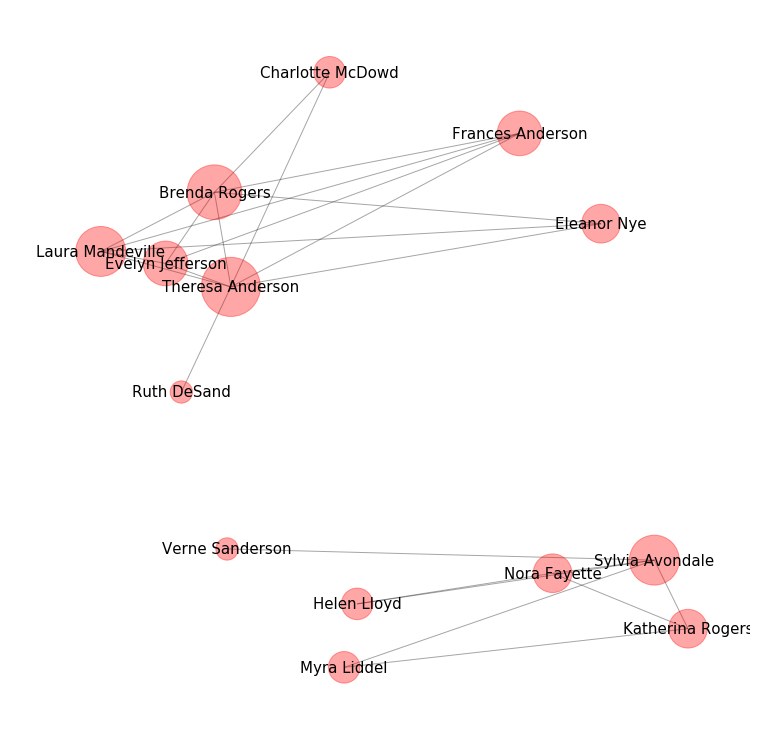

In [81]:
plt.figure(1,figsize=(10,10)) 

# trim unnecessary components in graph
W_island_level_3 = trim_edges(W, 3)
# get degree to be able to use for node size
W_island_level_3_degree = W_island_level_3.degree()
nx.draw(W_island_level_3, pos = pos, node_size=[v*500 for v in W_island_level_3_degree.values()],
        with_labels = True, alpha = 0.35, font_size = 15)

In [109]:
# get subgroup 1
subgroup1 = list(nx.connected_component_subgraphs(W_island_level_3))[0]

# get keys and values for degree and weighted degree metrics
weighted_degree_val = sorted(subgroup1.degree(weight = 'weight').values())
weighted_degree_key = sorted(subgroup1.degree(weight = 'weight').keys())

degree_val = sorted(subgroup1.degree().values())
degree_key = sorted(subgroup1.degree().keys())

# make dataframe
d = {'Women':weighted_degree_key, 'Weighted_Degree':weighted_degree_val, 'Degree':degree_val}
pd.DataFrame(d)

Women  Weighted_Degree  Degree
0     Brenda Rogers                4       1
1  Charlotte McDowd                8       2
2       Eleanor Nye               12       3
3  Evelyn Jefferson               16       4
4  Frances Anderson               23       4
5  Laura Mandeville               26       5
6       Ruth DeSand               30       6
7  Theresa Anderson               35       7

In [110]:
# get subgroup 2

subgroup2 = list(nx.connected_component_subgraphs(W_island_level_3))[1]

# get keys and values for degree and weighted degree metrics
weighted_degree_val = sorted(subgroup2.degree(weight = 'weight').values())
weighted_degree_key = sorted(subgroup2.degree(weight = 'weight').keys())

degree_val = sorted(subgroup2.degree().values())
degree_key = sorted(subgroup2.degree().keys())

# make dataframe
d = {'Women':weighted_degree_key, 'Weighted_Degree':weighted_degree_val, 'Degree':degree_val}
pd.DataFrame(d)

Women  Weighted_Degree  Degree
0       Helen Lloyd                4       1
1  Katherina Rogers                8       2
2       Myra Liddel                8       2
3      Nora Fayette               15       3
4   Sylvia Avondale               15       3
5   Verne Sanderson               24       5

In [108]:
# Get 4 women that were not in either group

outliers = list(set(W.degree(weight='weight').keys()) - set(W_island_level_3.degree(weight='weight').keys()))

outliers_df = pd.DataFrame(outliers)
outliers_df.columns = ['Women_Outliers']
outliers_df

Women_Outliers
0    Olivia Carleton
1   Pearl Oglethorpe
2        Flora Price
3  Dorothy Murchison

The first subgroup contains 8 individuals: Brenda Rogers, Charlotte McDowd, Eleanor Nye, Evelyn Jefferson, Frances Anderson, Laura Mandeville, Ruth DeSand, and Theresa Anderson.

The second subgroup contains 6 individuals: Helen Lloyd, Katherina Rogers, Myra Liddel, Nora Fayette, Sylvia Avondale, and Verne Sanderson.

The 4 individuals that were not apart of either subgroup are Olivia Carleton, Pearl Oglethorpe, Flora Price, and Dorothy Murchison. These 4 women connected the two subgroups together.

Theresa Anderson has connections with all of the other women in subgroup 1. She also has the highest weighted degree centrality (35), making her the most connected individual in subgroup 1. For subgroup 2, Verne Sanderson is the most connected individual. She is affiliated with the other 5 members of subgroup 2. She also has the highest weighted degree centrality (24) for subgroup 2.

# Analysis of Bipartite Graph
* project the bipartite graph on the women node
* calculate measures of centrality (Degrees, Closeness, Betweenness and Eigenvector)

In [50]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

W = bipartite.weighted_projected_graph(G, women)

In [51]:
deg = nx.degree(W)
deg_w = nx.degree(W, weight='weight')
c = nx.closeness_centrality(W)
b=nx.betweenness_centrality(W)
e = nx.eigenvector_centrality(W, max_iter=100) 

In [52]:
df = pd.DataFrame(women, columns=['name'])

In [53]:
df['Degree'] = df['name'].map(dict(deg))
df['Degree_weight'] = df['name'].map(dict(deg_w))
df['Closeness'] = df['name'].map(dict(c))
df['Betweenness'] = df['name'].map(dict(b))
df['Eigenvector'] = df['name'].map(dict(e))
df.round(decimals=4)

name  Degree  Degree_weight  Closeness  Betweenness  \
0    Evelyn Jefferson      17             50     1.0000       0.0101   
1    Laura Mandeville      15             45     0.8947       0.0027   
2    Theresa Anderson      17             57     1.0000       0.0101   
3       Brenda Rogers      15             46     0.8947       0.0027   
4    Charlotte McDowd      11             24     0.7391       0.0000   
5    Frances Anderson      15             32     0.8947       0.0027   
6         Eleanor Nye      15             36     0.8947       0.0027   
7    Pearl Oglethorpe      16             31     0.9444       0.0053   
8         Ruth DeSand      17             40     1.0000       0.0101   
9     Verne Sanderson      17             38     1.0000       0.0101   
10        Myra Liddel      16             33     0.9444       0.0053   
11   Katherina Rogers      16             37     0.9444       0.0053   
12    Sylvia Avondale      17             46     1.0000       0.0101   
13       Nora Fayette      17             43     1.0000       0.0101   
14        Helen Lloyd      17             34     1.0000       0.0101   
15  Dorothy Murchison      16             24     0.9444       0.0053   
16    Olivia Carleton      12             14     0.7727       0.0000   
17        Flora Price      12             14     0.7727       0.0000   

    Eigenvector  
0        0.3185  
1        0.3004  
2        0.3536  
3        0.3042  
4        0.1742  
5        0.2180  
6        0.2390  
7        0.1940  
8        0.2485  
9        0.2307  
10       0.1977  
11       0.2220  
12       0.2729  
13       0.2533  
14       0.2069  
15       0.1460  
16       0.0775  
17       0.0775

In [54]:
fig = px.scatter(df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=1000, height=600, title="Davis Southern Club Women (measures of centrality)")
fig.show()

### Conclusions
There are several clusters of centrality measures
* The centrality measure can be divided into the following 4 groups (g1 - g4)
* g1 - overall low measures of connectivity and centrality
* g4 - high measures of connectivity and centrality

In [55]:
df_g1 = df[df['Closeness'] < 0.8]
df_g1

name  Degree  Degree_weight  Closeness  Betweenness  \
4   Charlotte McDowd      11             24   0.739130          0.0   
16   Olivia Carleton      12             14   0.772727          0.0   
17       Flora Price      12             14   0.772727          0.0   

    Eigenvector  
4      0.174193  
16     0.077475  
17     0.077475

In [56]:
import numpy as np
df_g2 = df[np.logical_and(df['Closeness'] > 0.8, df['Closeness'] < 0.9)]
df_g2

name  Degree  Degree_weight  Closeness  Betweenness  \
1  Laura Mandeville      15             45   0.894737     0.002674   
3     Brenda Rogers      15             46   0.894737     0.002674   
5  Frances Anderson      15             32   0.894737     0.002674   
6       Eleanor Nye      15             36   0.894737     0.002674   

   Eigenvector  
1     0.300407  
3     0.304244  
5     0.217956  
6     0.239037

In [57]:
df_g3 = df[np.logical_and(df['Closeness'] > 0.9, df['Closeness'] < 0.95)]
df_g3

name  Degree  Degree_weight  Closeness  Betweenness  \
7    Pearl Oglethorpe      16             31   0.944444     0.005348   
10        Myra Liddel      16             33   0.944444     0.005348   
11   Katherina Rogers      16             37   0.944444     0.005348   
15  Dorothy Murchison      16             24   0.944444     0.005348   

    Eigenvector  
7      0.194011  
10     0.197727  
11     0.221975  
15     0.146013

In [58]:
df_g4 = df[np.logical_and(df['Closeness'] > 0.95, df['Closeness'] < 1.2)]
df_g4

name  Degree  Degree_weight  Closeness  Betweenness  \
0   Evelyn Jefferson      17             50        1.0     0.010122   
2   Theresa Anderson      17             57        1.0     0.010122   
8        Ruth DeSand      17             40        1.0     0.010122   
9    Verne Sanderson      17             38        1.0     0.010122   
12   Sylvia Avondale      17             46        1.0     0.010122   
13      Nora Fayette      17             43        1.0     0.010122   
14       Helen Lloyd      17             34        1.0     0.010122   

    Eigenvector  
0      0.318519  
2      0.353554  
8      0.248510  
9      0.230700  
12     0.272878  
13     0.253274  
14     0.206941

### Relationship Between Centrality Measures
There is a positive linear relationship between all measures of centrality with the exception of the the weighted degree calculations


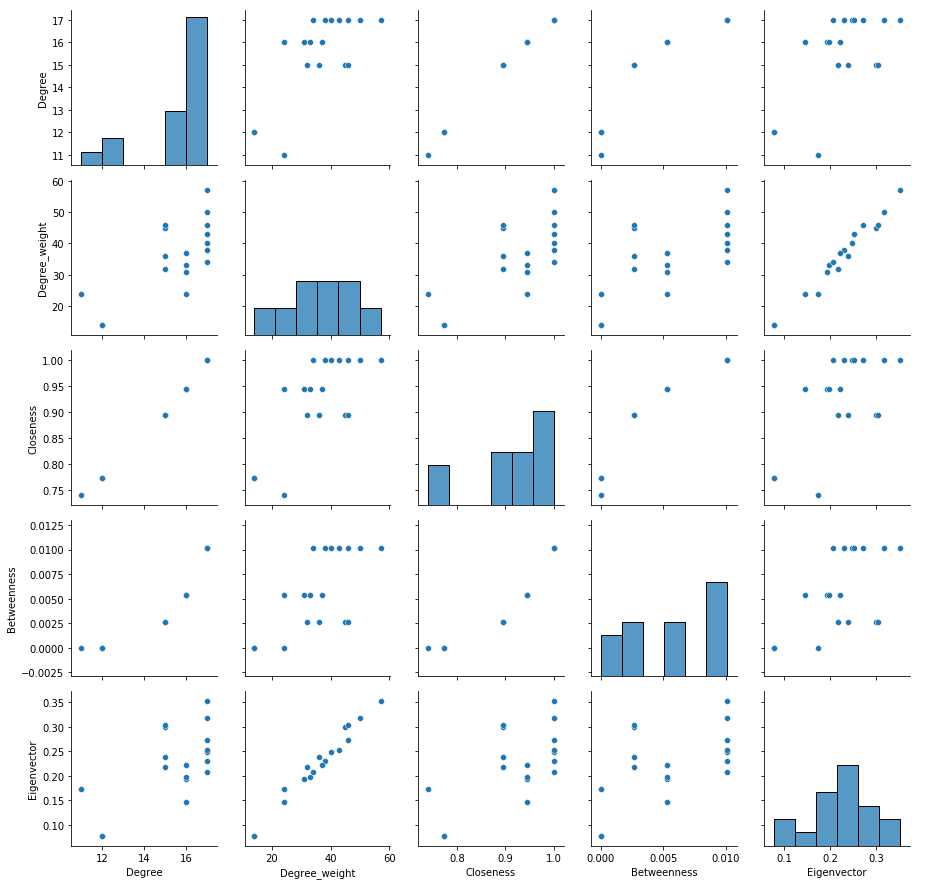

In [59]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Conclusion

The four most popular clubs in the network are clearly E6, E7, E8, E9 and thus have the greatest reach. Therefore, if we wanted to get a message to all women, we should use these three clubs to broadcast.
Even though Club E6 has eight members, its centralities are high. 
We can conclude that the most connected people in the network are women who have access to these clubs. And even though members like Ruth and Verne are only part of 4 clubs, their degree centrality and closeness centrality are very high. 